In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load data dan preprocessing


In [ ]:
# import library
import torch
from torchvision import datasets, transforms,models
from torch.utils.data import DataLoader

# import dataset
base_dir = '/content/drive/MyDrive/Data AI/Freshwater Fish Disease Aquaculture in south asia'
train_dir = f'{base_dir}/Train'
test_dir = f'{base_dir}/Test'

# transformasi data (masih perlu adjust)
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),  # Resize the images as needed
        transforms.ToTensor(),         # Convert the images to Tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize the images
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),  # Resize the images as needed
        transforms.ToTensor(),         # Convert the images to Tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize the images
    ]),
}
#dataset udah di split
train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['test'])

# load data
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=50, shuffle=False)

# check class
print(train_dataset.class_to_idx)
print(test_dataset.class_to_idx)

{'Bacterial Red disease': 0, 'Bacterial diseases - Aeromoniasis': 1, 'Bacterial gill disease': 2, 'Fungal diseases Saprolegniasis': 3, 'Healthy Fish': 4, 'Parasitic diseases': 5, 'Viral diseases White tail disease': 6}
{'Bacterial Red disease': 0, 'Bacterial diseases - Aeromoniasis': 1, 'Bacterial gill disease': 2, 'Fungal diseases Saprolegniasis': 3, 'Healthy Fish': 4, 'Parasitic diseases': 5, 'Viral diseases White tail disease': 6}


In [ ]:
num_classes = len(train_dataset.classes)
num_classes

7

#Arsitektur dan Adjustment

In [ ]:
# import model
import numpy as np
model = models.mobilenet_v3_large(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 134MB/s] 


In [ ]:
from torch import nn, optim

for param in model.parameters():
  param.requires_grad = False

In [ ]:
model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [ ]:
model.classifier = nn.Sequential(
    nn.Linear ( 960, 7),
    nn.Softmax (dim=1)
)

In [ ]:
model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
class Fishmodel (nn.Module) :
  def freeze (self) :
    for param in self.model.parameters():
      param.requires_grad = False
  def unfreeze (self) :
    for param in model.parameters():
      param.requires_grad = True
  def __init__(self, output_size) :
    super ().__init__()
    self.model = models.mobilenet_v3_large(pretrained=True)
    self.freeze()
    self.model.classifier = nn.Sequential(
    nn.Linear ( 960, output_size),
    nn.Softmax()
)

  def forward (self,x) :
    return self.model(x)


In [ ]:
!pip install --upgrade jcopdl==1.1.10

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

In [ ]:
import jcopdl
from jcopdl.callback import Callback, set_config
bs = 64
crop_size = 224
config = set_config ({
"output_size" : len(train_dataset.classes),
"batch_size": bs,
"crop_size": crop_size
})

#adaptasi dan config

In [ ]:
model = Fishmodel (config.output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model,config, early_stop_patience=2, outdir="model")

In [ ]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
        cost = correct = 0 # Inisialisasi cost sebagai None di luar kondisi
    elif mode == "test":
        model.eval()
        cost = correct = 0

    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)

        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()

    # Hitung cost normalisasi hanya di bawah kondisi "test"

    cost = cost / len(dataset)
    acc = correct / len(dataset)

    return cost, acc


Train:   0%|          | 0/35 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch     1
Train_cost  = 1.8640 | Test_cost  = 1.7681 | Train_score = 0.3326 | Test_score = 0.4929 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch     2
Train_cost  = 1.7089 | Test_cost  = 1.6445 | Train_score = 0.5954 | Test_score = 0.6457 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch     3
Train_cost  = 1.6081 | Test_cost  = 1.5636 | Train_score = 0.6937 | Test_score = 0.7171 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch     4
Train_cost  = 1.5510 | Test_cost  = 1.5155 | Train_score = 0.7331 | Test_score = 0.7500 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch     5
Train_cost  = 1.5161 | Test_cost  = 1.4766 | Train_score = 0.7554 | Test_score = 0.7814 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch     6
Train_cost  = 1.4848 | Test_cost  = 1.4531 | Train_score = 0.7737 | Test_score = 0.7914 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch     7
Train_cost  = 1.4668 | Test_cost  = 1.4287 | Train_score = 0.7794 | Test_score = 0.8186 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch     8
Train_cost  = 1.4431 | Test_cost  = 1.4137 | Train_score = 0.8063 | Test_score = 0.8343 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch     9
Train_cost  = 1.4306 | Test_cost  = 1.3965 | Train_score = 0.8097 | Test_score = 0.8486 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    10
Train_cost  = 1.4163 | Test_cost  = 1.3823 | Train_score = 0.8269 | Test_score = 0.8529 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    11
Train_cost  = 1.4083 | Test_cost  = 1.3734 | Train_score = 0.8280 | Test_score = 0.8614 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    12
Train_cost  = 1.3923 | Test_cost  = 1.3648 | Train_score = 0.8451 | Test_score = 0.8714 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    13
Train_cost  = 1.3852 | Test_cost  = 1.3546 | Train_score = 0.8429 | Test_score = 0.8743 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    14
Train_cost  = 1.3776 | Test_cost  = 1.3467 | Train_score = 0.8520 | Test_score = 0.8800 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    15
Train_cost  = 1.3724 | Test_cost  = 1.3435 | Train_score = 0.8577 | Test_score = 0.8843 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    16
Train_cost  = 1.3654 | Test_cost  = 1.3336 | Train_score = 0.8651 | Test_score = 0.8871 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    17
Train_cost  = 1.3547 | Test_cost  = 1.3259 | Train_score = 0.8731 | Test_score = 0.8914 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    18
Train_cost  = 1.3543 | Test_cost  = 1.3261 | Train_score = 0.8743 | Test_score = 0.8943 |
==> EarlyStop patience =  1 | Best test_cost: 1.3259


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    19
Train_cost  = 1.3477 | Test_cost  = 1.3184 | Train_score = 0.8714 | Test_score = 0.8914 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    20
Train_cost  = 1.3418 | Test_cost  = 1.3173 | Train_score = 0.8846 | Test_score = 0.8971 |


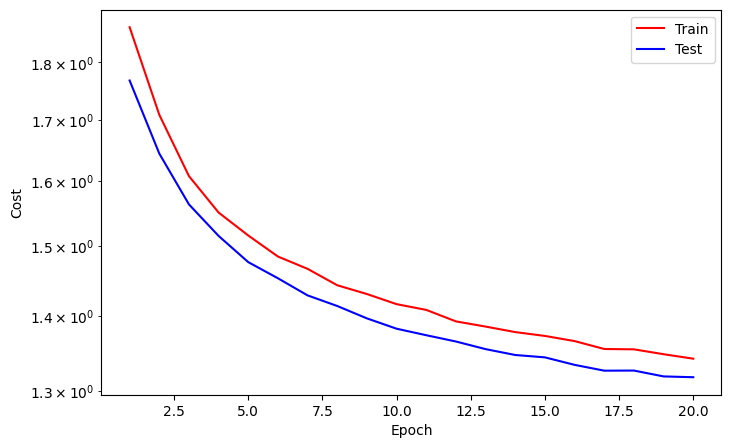

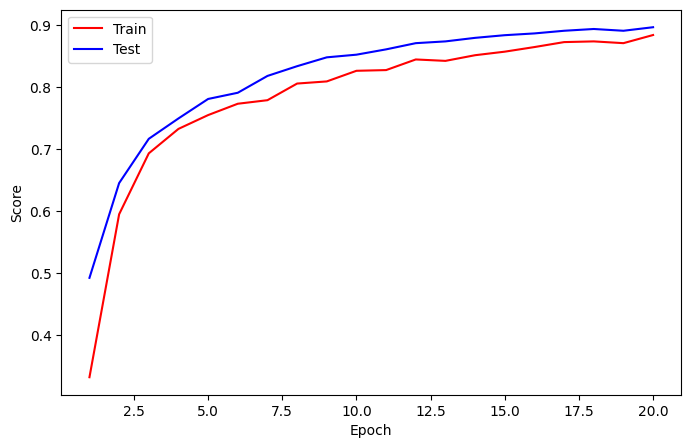

Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    21
Train_cost  = 1.3352 | Test_cost  = 1.3143 | Train_score = 0.8823 | Test_score = 0.9029 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    22
Train_cost  = 1.3300 | Test_cost  = 1.3059 | Train_score = 0.8909 | Test_score = 0.9029 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    23
Train_cost  = 1.3312 | Test_cost  = 1.3021 | Train_score = 0.8920 | Test_score = 0.9071 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    24
Train_cost  = 1.3225 | Test_cost  = 1.2993 | Train_score = 0.8971 | Test_score = 0.9057 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    25
Train_cost  = 1.3192 | Test_cost  = 1.2976 | Train_score = 0.9000 | Test_score = 0.9143 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    26
Train_cost  = 1.3153 | Test_cost  = 1.2927 | Train_score = 0.9011 | Test_score = 0.9171 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    27
Train_cost  = 1.3138 | Test_cost  = 1.2928 | Train_score = 0.9017 | Test_score = 0.9200 |
==> EarlyStop patience =  1 | Best test_cost: 1.2927


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    28
Train_cost  = 1.3107 | Test_cost  = 1.2880 | Train_score = 0.9046 | Test_score = 0.9214 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    29
Train_cost  = 1.3082 | Test_cost  = 1.2854 | Train_score = 0.9029 | Test_score = 0.9214 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    30
Train_cost  = 1.3062 | Test_cost  = 1.2844 | Train_score = 0.9057 | Test_score = 0.9229 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    31
Train_cost  = 1.3039 | Test_cost  = 1.2800 | Train_score = 0.9097 | Test_score = 0.9243 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    32
Train_cost  = 1.3017 | Test_cost  = 1.2776 | Train_score = 0.9137 | Test_score = 0.9257 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    33
Train_cost  = 1.3003 | Test_cost  = 1.2740 | Train_score = 0.9114 | Test_score = 0.9271 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    34
Train_cost  = 1.2937 | Test_cost  = 1.2730 | Train_score = 0.9171 | Test_score = 0.9300 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    35
Train_cost  = 1.2957 | Test_cost  = 1.2705 | Train_score = 0.9160 | Test_score = 0.9329 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    36
Train_cost  = 1.2888 | Test_cost  = 1.2695 | Train_score = 0.9234 | Test_score = 0.9286 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    37
Train_cost  = 1.2875 | Test_cost  = 1.2685 | Train_score = 0.9206 | Test_score = 0.9329 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    38
Train_cost  = 1.2869 | Test_cost  = 1.2669 | Train_score = 0.9251 | Test_score = 0.9314 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    39
Train_cost  = 1.2863 | Test_cost  = 1.2644 | Train_score = 0.9217 | Test_score = 0.9314 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    40
Train_cost  = 1.2853 | Test_cost  = 1.2621 | Train_score = 0.9211 | Test_score = 0.9357 |


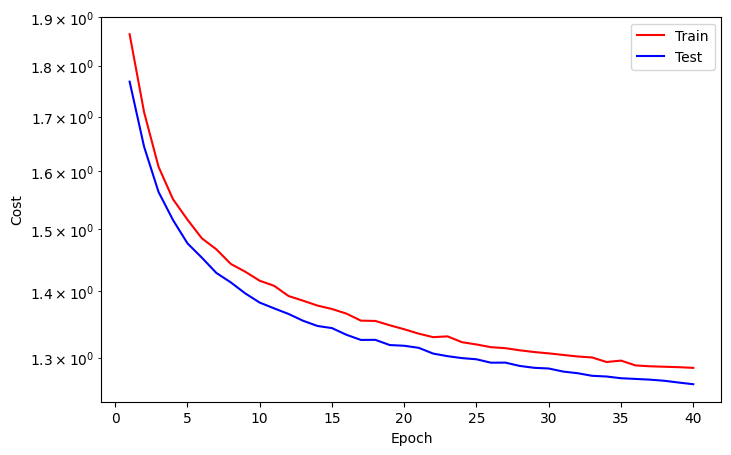

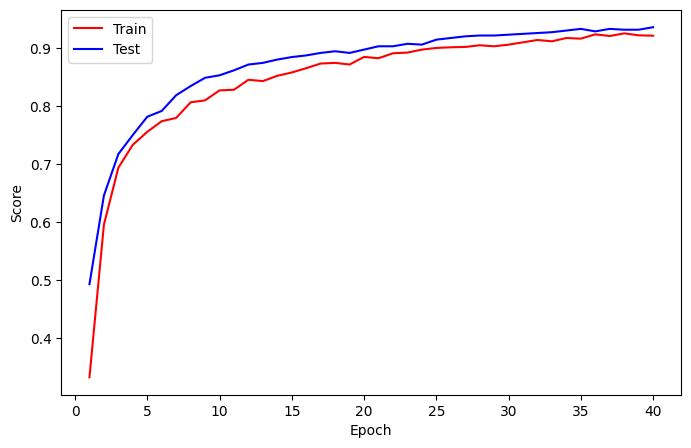

Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    41
Train_cost  = 1.2827 | Test_cost  = 1.2605 | Train_score = 0.9234 | Test_score = 0.9343 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    42
Train_cost  = 1.2781 | Test_cost  = 1.2604 | Train_score = 0.9280 | Test_score = 0.9343 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    43
Train_cost  = 1.2830 | Test_cost  = 1.2594 | Train_score = 0.9257 | Test_score = 0.9357 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    44
Train_cost  = 1.2742 | Test_cost  = 1.2576 | Train_score = 0.9291 | Test_score = 0.9371 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    45
Train_cost  = 1.2739 | Test_cost  = 1.2552 | Train_score = 0.9274 | Test_score = 0.9386 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    46
Train_cost  = 1.2717 | Test_cost  = 1.2543 | Train_score = 0.9320 | Test_score = 0.9371 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    47
Train_cost  = 1.2703 | Test_cost  = 1.2542 | Train_score = 0.9326 | Test_score = 0.9371 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    48
Train_cost  = 1.2732 | Test_cost  = 1.2521 | Train_score = 0.9280 | Test_score = 0.9357 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    49
Train_cost  = 1.2703 | Test_cost  = 1.2514 | Train_score = 0.9314 | Test_score = 0.9400 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    50
Train_cost  = 1.2690 | Test_cost  = 1.2484 | Train_score = 0.9314 | Test_score = 0.9400 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    51
Train_cost  = 1.2679 | Test_cost  = 1.2475 | Train_score = 0.9303 | Test_score = 0.9400 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    52
Train_cost  = 1.2658 | Test_cost  = 1.2462 | Train_score = 0.9349 | Test_score = 0.9414 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    53
Train_cost  = 1.2650 | Test_cost  = 1.2464 | Train_score = 0.9366 | Test_score = 0.9400 |
==> EarlyStop patience =  1 | Best test_cost: 1.2462


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    54
Train_cost  = 1.2624 | Test_cost  = 1.2460 | Train_score = 0.9371 | Test_score = 0.9414 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    55
Train_cost  = 1.2620 | Test_cost  = 1.2457 | Train_score = 0.9371 | Test_score = 0.9414 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    56
Train_cost  = 1.2670 | Test_cost  = 1.2446 | Train_score = 0.9320 | Test_score = 0.9400 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    57
Train_cost  = 1.2627 | Test_cost  = 1.2448 | Train_score = 0.9343 | Test_score = 0.9400 |
==> EarlyStop patience =  1 | Best test_cost: 1.2446


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    58
Train_cost  = 1.2579 | Test_cost  = 1.2413 | Train_score = 0.9417 | Test_score = 0.9429 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    59
Train_cost  = 1.2572 | Test_cost  = 1.2401 | Train_score = 0.9389 | Test_score = 0.9443 |


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    60
Train_cost  = 1.2592 | Test_cost  = 1.2432 | Train_score = 0.9371 | Test_score = 0.9443 |


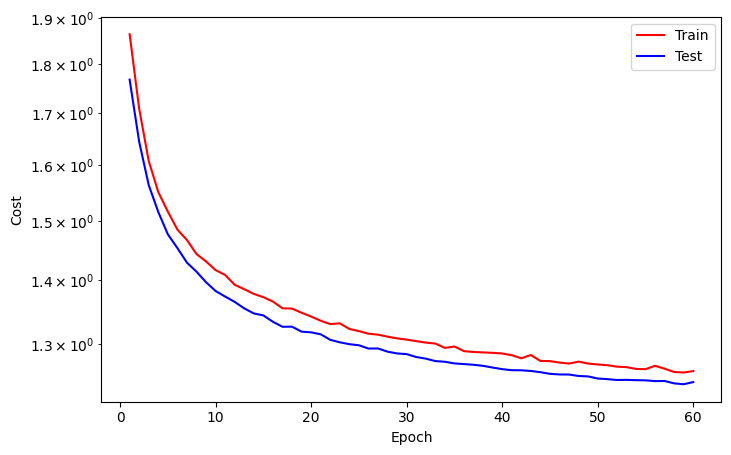

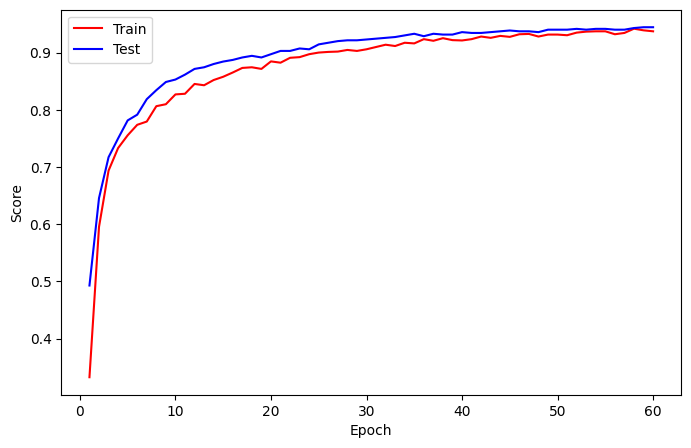

==> EarlyStop patience =  1 | Best test_cost: 1.2401


Train:   0%|          | 0/35 [00:00<?, ?it/s]

Test:   0%|          | 0/14 [00:00<?, ?it/s]


Epoch    61
Train_cost  = 1.2549 | Test_cost  = 1.2407 | Train_score = 0.9394 | Test_score = 0.9443 |
==> EarlyStop patience =  2 | Best test_cost: 1.2401
==> Execute Early Stopping at epoch: 61 | Best test_cost: 1.2401
==> Best model is saved at model


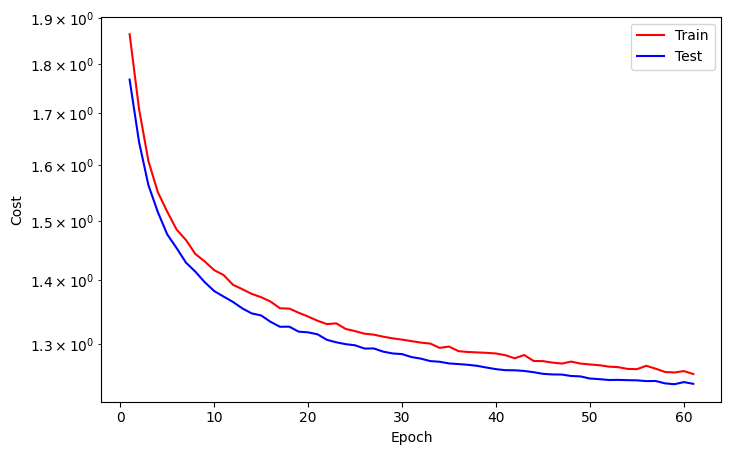

In [ ]:
while True:
  train_cost, train_score = loop_fn("train", train_dataset, train_loader, model, criterion, optimizer, device)
  with torch.no_grad():
    test_cost, test_score = loop_fn("test", test_dataset, test_loader, model, criterion, optimizer, device)

  # Logging
  callback.log(train_cost, test_cost, train_score, test_score)

  # Checkpoint
  callback.save_checkpoint()

  #Runtime Plotting
  callback.cost_runtime_plotting()
  callback.score_runtime_plotting()

  #Early Stopping
  if callback.early_stopping(model, monitor="test_cost"):
    callback.plot_cost()
    break

#Save model

In [ ]:
!zip -r model.zip /content/model